In [1]:
#### 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
# CSV 파일 불러오기
df = pd.read_csv('/Users/kimgayeong/Desktop/데이터톤/data 3/실습데이터.csv') 

In [3]:
df1 = pd.read_csv('/Users/kimgayeong/Desktop/데이터톤/data 3/raw_total_data.csv')

In [4]:
columns_to_drop = [
    'KO6_MOTOR_SET_FREQ.xlsx', 'KO6_MOTOR_CURR.xlsx', 'KO6_MOTOR_INVERTER_ALM.xlsx',
    'TRANS_POS_LEFT.xlsx', 'TRANS_POS_RIGHT.xlsx', 'TRANS_POS_UP.xlsx', 'TRANS_POS_DOWN.xlsx',
    'TRANS_POS_LEFT_SET_H.xlsx', 'TRANS_POS_RIGHT_SET_H.xlsx', 'TRANS_POS_UP_SET_H.xlsx', 'TRANS_POS_DOWN_SET_H.xlsx',
    'TRANS_POS_LEFT_SET_L.xlsx', 'TRANS_POS_RIGHT_SET_L.xlsx', 'TRANS_POS_UP_SET_L.xlsx', 'TRANS_POS_DOWN_SET_L.xlsx'
]

df = df.drop(columns=columns_to_drop, errors='ignore')

In [5]:
columns_to_drop = [
    'KO6_MOTOR_SET_FREQ.xlsx', 'KO6_MOTOR_CURR.xlsx', 'KO6_MOTOR_INVERTER_ALM.xlsx',
    'TRANS_POS_LEFT.xlsx', 'TRANS_POS_RIGHT.xlsx', 'TRANS_POS_UP.xlsx', 'TRANS_POS_DOWN.xlsx',
    'TRANS_POS_LEFT_SET_H.xlsx', 'TRANS_POS_RIGHT_SET_H.xlsx', 'TRANS_POS_UP_SET_H.xlsx', 'TRANS_POS_DOWN_SET_H.xlsx',
    'TRANS_POS_LEFT_SET_L.xlsx', 'TRANS_POS_RIGHT_SET_L.xlsx', 'TRANS_POS_UP_SET_L.xlsx', 'TRANS_POS_DOWN_SET_L.xlsx'
]

df1 = df1.drop(columns=columns_to_drop, errors='ignore')

In [6]:
print(df.columns.tolist())

['Timestamp', 'OUTPUT_COUNT_DAY_1.xlsx', 'CUTTING_SET_FREQ.xlsx', 'STATUS.xlsx', 'KO5_MOTOR_SET_FREQ.xlsx', 'METAL_OIL_SUPPLY_PRESS_CONTR.xlsx', 'KO4_MOTOR_SET_FREQ.xlsx', 'KO2_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx', 'KO3_MOTOR_SET_FREQ.xlsx', 'TONGS_INVERTER_ALM_ERR_CD.xlsx', 'KO1_MOTOR_SET_FREQ.xlsx', 'KO3_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_RPM.xlsx', 'TRANS_CURR.xlsx', 'KO1_MOTOR_CURR.xlsx', 'TRANS_INVERTER_ALM_ERR_CD.xlsx', 'TONGS_CAST_SET_FREQ.xlsx', 'KO4_MOTOR_INVERTER_ALM.xlsx', 'OIL_SUPPLY_PRESS.xlsx', 'KO2_MOTOR_INVERTER_ALM.xlsx', 'KO3_MOTOR_CURR.xlsx', 'TONGS_POS.xlsx', 'WORK_OIL_SUPPLY_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx', 'TONGS_CAST_CURR.xlsx', 'CUTTING_INVERTER_ALM_ERR_CD.xlsx', 'KO4_MOTOR_CURR.xlsx', 'METAL_OIL_SUPPLY_PRESS_CUT.xlsx', 'MAIN_AIR_PRESS.xlsx', 'TRANS_SET_FREQ.xlsx', 'METAL_TEMP_CUT.xlsx', 'KO5_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_SET_FREQ.xlsx', 'OIL_PRESS_LEVEL_ALM.xlsx', 'CUTTING_CURR.xlsx', 'KO5_MOTOR_CURR.xlsx', 'KO2_MOTOR_CURR.xlsx', 'KO1_

In [7]:
feature_list = ['Timestamp', 'OUTPUT_COUNT_DAY_1.xlsx', 'CUTTING_SET_FREQ.xlsx', 'STATUS.xlsx', 'KO5_MOTOR_SET_FREQ.xlsx', 'METAL_OIL_SUPPLY_PRESS_CONTR.xlsx', 'KO4_MOTOR_SET_FREQ.xlsx', 'KO2_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx', 'KO3_MOTOR_SET_FREQ.xlsx', 'TONGS_INVERTER_ALM_ERR_CD.xlsx', 'KO1_MOTOR_SET_FREQ.xlsx', 'KO3_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_RPM.xlsx', 'TRANS_CURR.xlsx', 'KO1_MOTOR_CURR.xlsx', 'TRANS_INVERTER_ALM_ERR_CD.xlsx', 'TONGS_CAST_SET_FREQ.xlsx', 'KO4_MOTOR_INVERTER_ALM.xlsx', 'OIL_SUPPLY_PRESS.xlsx', 'KO2_MOTOR_INVERTER_ALM.xlsx', 'KO3_MOTOR_CURR.xlsx', 'TONGS_POS.xlsx', 'WORK_OIL_SUPPLY_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx', 'TONGS_CAST_CURR.xlsx', 'CUTTING_INVERTER_ALM_ERR_CD.xlsx', 'KO4_MOTOR_CURR.xlsx', 'METAL_OIL_SUPPLY_PRESS_CUT.xlsx', 'MAIN_AIR_PRESS.xlsx', 'TRANS_SET_FREQ.xlsx', 'METAL_TEMP_CUT.xlsx', 'KO5_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_SET_FREQ.xlsx', 'OIL_PRESS_LEVEL_ALM.xlsx', 'CUTTING_CURR.xlsx', 'KO5_MOTOR_CURR.xlsx', 'KO2_MOTOR_CURR.xlsx', 'KO1_MOTOR_INVERTER_ALM.xlsx', 'OUTPUT_COUNT_DAY_2.xlsx', 'OUTPUT_COUNT_SUM.xlsx', 'MAIN_MOTOR_ALM.xlsx']  
df = df[feature_list]

In [8]:
df

,Timestamp,OUTPUT_COUNT_DAY_1.xlsx,CUTTING_SET_FREQ.xlsx,STATUS.xlsx,KO5_MOTOR_SET_FREQ.xlsx,METAL_OIL_SUPPLY_PRESS_CONTR.xlsx,KO4_MOTOR_SET_FREQ.xlsx,KO2_MOTOR_SET_FREQ.xlsx,MAIN_MOTOR_CURR.xlsx,KO3_MOTOR_SET_FREQ.xlsx,...,KO5_MOTOR_INVERTER_ALM.xlsx,MAIN_MOTOR_SET_FREQ.xlsx,OIL_PRESS_LEVEL_ALM.xlsx,CUTTING_CURR.xlsx,KO5_MOTOR_CURR.xlsx,KO2_MOTOR_CURR.xlsx,KO1_MOTOR_INVERTER_ALM.xlsx,OUTPUT_COUNT_DAY_2.xlsx,OUTPUT_COUNT_SUM.xlsx,MAIN_MOTOR_ALM.xlsx
0,2022-05-02 06:32:33,25878.0,3000.0,0.0,3000.0,661.166,3000.0,3000.0,2192.50,3000.0,...,0.5,2166.5,0.0,0.0,0.0,0.0,0.5,25881.0,27510.0,0.0
1,2022-05-02 06:32:34,25878.0,3000.0,0.0,3000.0,798.000,3000.0,3000.0,4108.00,3000.0,...,0.5,2166.5,0.0,0.0,0.0,0.0,0.5,25881.0,27510.0,0.0
2,2022-05-02 06:32:35,25878.0,3000.0,0.0,3000.0,794.000,3000.0,3000.0,4158.00,3000.0,...,0.5,2166.5,0.0,0.0,0.0,0.0,0.5,25881.0,27510.0,0.0
3,2022-05-02 06:32:36,25878.0,3000.0,0.0,3000.0,788.600,3000.0,3000.0,4118.00,3000.0,...,0.5,2166.5,0.0,0.0,0.0,0.0,0.5,25881.0,27510.0,0.0
4,2022-05-02 06:32:37,25878.0,3000.0,0.0,3000.0,804.200,3000.0,3000.0,4063.00,3000.0,...,0.5,2166.5,0.0,0.0,0.0,0.0,0.5,25881.0,27510.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579292,2022-05-14 04:34:32,29160.0,6000.0,0.0,6000.0,254.875,6000.0,6000.0,3905.00,6000.0,...,1.0,4333.0,0.0,0.0,0.0,0.0,1.0,29160.0,1879.0,0.0
579293,2022-05-14 04:34:33,29160.0,6000.0,0.0,6000.0,254.875,6000.0,6000.0,3905.00,6000.0,...,1.0,4333.0,0.0,0.0,0.0,0.0,1.0,29160.0,1879.0,0.0
579294,2022-05-14 04:34:39,29160.0,6000.0,0.0,6000.0,254.875,6000.0,6000.0,3905.00,6000.0,...,1.0,4333.0,0.0,0.0,0.0,0.0,1.0,29160.0,1879.0,0.0
579295,2022-05-14 04:34:40,29160.0,6000.0,0.0,6000.0,262.579,6000.0,6000.0,3900.42,6000.0,...,1.0,4333.0,0.0,0.0,0.0,0.0,1.0,29160.0,1879.0,0.0


In [9]:
df['efficiency'] = df['MAIN_MOTOR_RPM.xlsx'] / df['MAIN_MOTOR_CURR.xlsx']

In [10]:
# 타깃 변수 설정
y = df['efficiency']
X = df.drop(columns=['efficiency'])

In [11]:
# 문자열을 datetime 타입으로 변환
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 예시: 시간 차이(초)로 변환 (가장 오래된 시점 기준)
df['timestamp_seconds'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds()

# 이후 drop
X = df.drop(columns=['efficiency', 'Timestamp'])
y = df['efficiency']

In [12]:
df['efficiency'] = df['MAIN_MOTOR_RPM.xlsx'] / df['MAIN_MOTOR_CURR.xlsx']
df = df.dropna(subset=['efficiency'])  # NaN 효율 제거

df = df[df['MAIN_MOTOR_CURR.xlsx'] != 0]  # 0으로 나누는 행 제거
df['efficiency'] = df['MAIN_MOTOR_RPM.xlsx'] / df['MAIN_MOTOR_CURR.xlsx']

In [27]:
X_train = X
y_train = y

In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
importances = model.feature_importances_

In [33]:
# 중요도 추출
importances = model.feature_importances_
features = X_train.columns

# 데이터프레임 정리
import pandas as pd
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_df.head(10))  # 중요도 상위 10개 출력

                            feature  importance
7              MAIN_MOTOR_CURR.xlsx    0.532796
12              MAIN_MOTOR_RPM.xlsx    0.465902
24             TONGS_CAST_CURR.xlsx    0.000681
41                timestamp_seconds    0.000522
28              MAIN_AIR_PRESS.xlsx    0.000022
2                       STATUS.xlsx    0.000016
39            OUTPUT_COUNT_SUM.xlsx    0.000007
27  METAL_OIL_SUPPLY_PRESS_CUT.xlsx    0.000006
19      KO2_MOTOR_INVERTER_ALM.xlsx    0.000004
18            OIL_SUPPLY_PRESS.xlsx    0.000004


                            feature  importance
7              MAIN_MOTOR_CURR.xlsx    0.532796
12              MAIN_MOTOR_RPM.xlsx    0.465902
24             TONGS_CAST_CURR.xlsx    0.000681
41                timestamp_seconds    0.000522
28              MAIN_AIR_PRESS.xlsx    0.000022
2                       STATUS.xlsx    0.000016
39            OUTPUT_COUNT_SUM.xlsx    0.000007
27  METAL_OIL_SUPPLY_PRESS_CUT.xlsx    0.000006
19      KO2_MOTOR_INVERTER_ALM.xlsx    0.000004
18            OIL_SUPPLY_PRESS.xlsx    0.000004


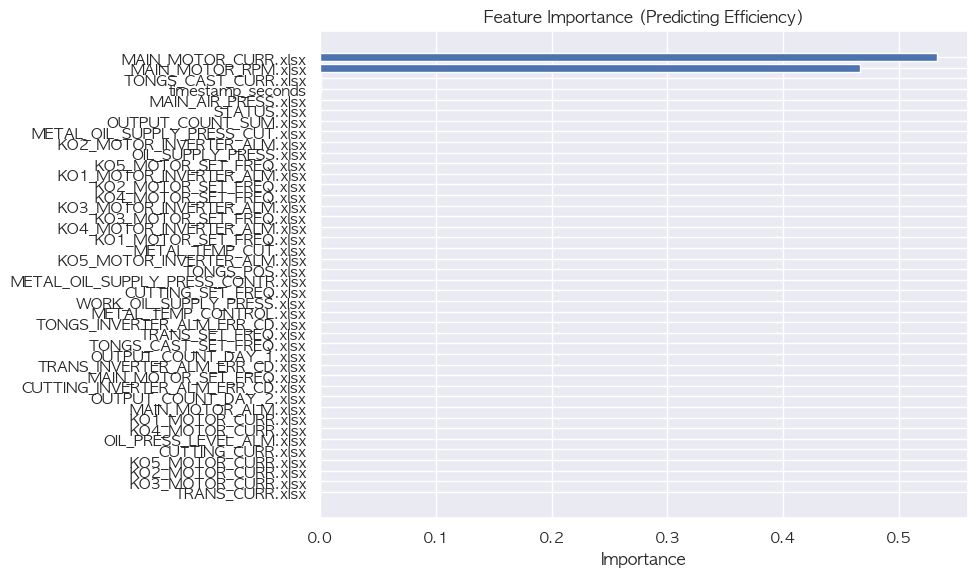

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 중요도 추출
importances = model.feature_importances_
features = X.columns

# 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 출력
print(importance_df.head(10))  # 상위 10개

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance (Predicting Efficiency)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

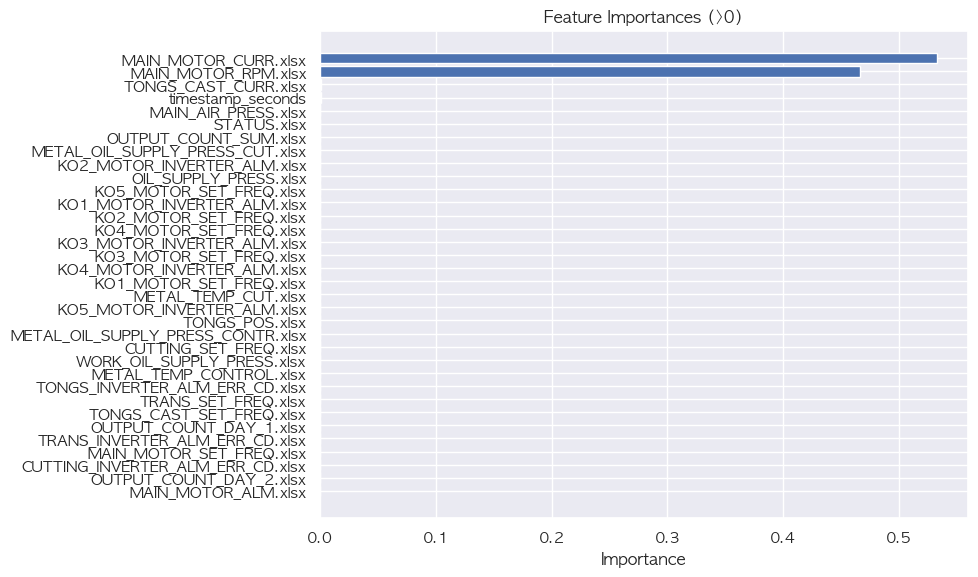

In [37]:
# 중요도가 0보다 큰 feature만 시각화
nonzero_importance_df = importance_df[importance_df['importance'] > 0]

plt.figure(figsize=(10, 6))
plt.barh(nonzero_importance_df['feature'], nonzero_importance_df['importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances (>0)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [41]:
print(y.describe())  # 분포 확인
print(y.isna().sum())  # NaN 확인

count    561809.000000
mean          2.649643
std           0.583404
min           0.000000
25%           2.151440
50%           2.820351
75%           3.154331
max           6.616438
Name: efficiency, dtype: float64
0


샘플 수: 56만 개로 매우 충분.

평균: 약 2.65

표준편차: 0.58 — 데이터가 꽤 몰려 있음 (분산이 낮음).

최소값 = 0 — 이건 조금 주의할 포인트입니다.

최댓값 = 6.61 — 이상치 가능성 있음.

In [44]:
df = df[df['efficiency'] > 0]  # efficiency가 0인 경우 제거

In [46]:
X_train = X
y_train = y

                            feature  importance
7              MAIN_MOTOR_CURR.xlsx    0.532796
12              MAIN_MOTOR_RPM.xlsx    0.465902
24             TONGS_CAST_CURR.xlsx    0.000681
41                timestamp_seconds    0.000522
28              MAIN_AIR_PRESS.xlsx    0.000022
2                       STATUS.xlsx    0.000016
39            OUTPUT_COUNT_SUM.xlsx    0.000007
27  METAL_OIL_SUPPLY_PRESS_CUT.xlsx    0.000006
19      KO2_MOTOR_INVERTER_ALM.xlsx    0.000004
18            OIL_SUPPLY_PRESS.xlsx    0.000004


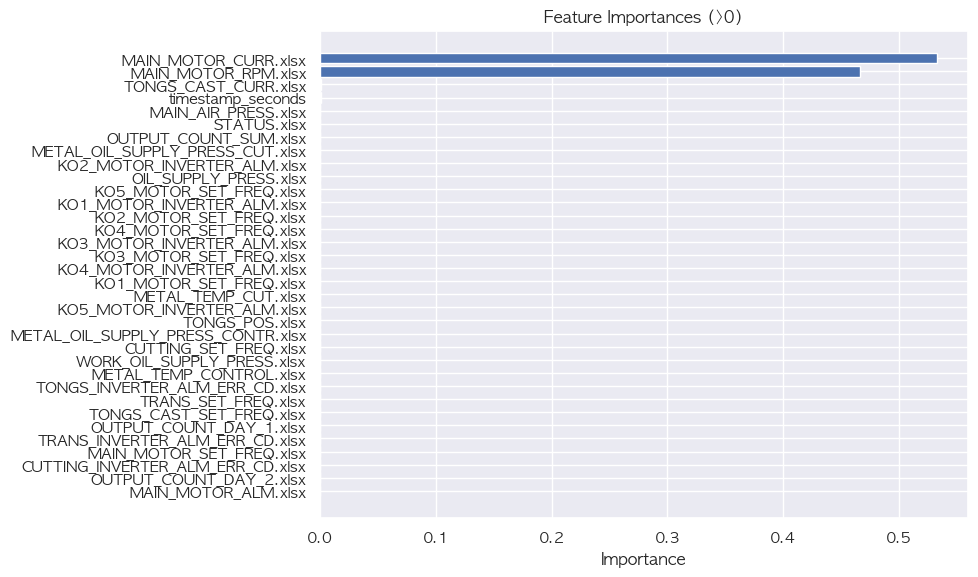

In [50]:
# 중요도가 0보다 큰 feature만 시각화
nonzero_importance_df = importance_df[importance_df['importance'] > 0]

print(importance_df.head(10))  # 상위 10개

plt.figure(figsize=(10, 6))
plt.barh(nonzero_importance_df['feature'], nonzero_importance_df['importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances (>0)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [52]:
# 숫자형 컬럼만 사용
X = df.drop(columns=['efficiency', 'Timestamp'])  # target은 제외, Timestamp도 제거
X = X.select_dtypes(include='number')  # 숫자형만 남기기
y = df['efficiency']

# 결측치 제거
X = X.dropna(axis=1)  # NaN 있는 컬럼 제거
y = y.dropna()

# 데이터 스케일링 (선택)
from sklearn.preprocessing import StandardScaler
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

# 학습
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 피처 중요도
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_df.head(10))

                        feature  importance
7          MAIN_MOTOR_CURR.xlsx    0.532698
12          MAIN_MOTOR_RPM.xlsx    0.466020
41            timestamp_seconds    0.000796
24         TONGS_CAST_CURR.xlsx    0.000377
2                   STATUS.xlsx    0.000024
28          MAIN_AIR_PRESS.xlsx    0.000023
39        OUTPUT_COUNT_SUM.xlsx    0.000007
19  KO2_MOTOR_INVERTER_ALM.xlsx    0.000004
5       KO4_MOTOR_SET_FREQ.xlsx    0.000004
10      KO1_MOTOR_SET_FREQ.xlsx    0.000004


In [56]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
importances = model.feature_importances_

In [60]:
importances

array([1.82409196e-07, 6.83687249e-07, 2.40565490e-05, 3.32848584e-06,
       2.80874631e-06, 3.76625175e-06, 3.22764942e-06, 5.32698448e-01,
       3.29017669e-06, 4.05106904e-07, 3.73327838e-06, 2.85661113e-06,
       4.66020315e-01, 0.00000000e+00, 0.00000000e+00, 6.92949642e-07,
       1.84390525e-06, 2.69501123e-06, 2.25418800e-06, 4.05101606e-06,
       0.00000000e+00, 2.68697663e-06, 1.17538026e-06, 2.05013006e-06,
       3.77120603e-04, 1.66749874e-07, 0.00000000e+00, 3.19651902e-06,
       2.25093907e-05, 3.77514582e-07, 2.25316586e-06, 2.71122523e-06,
       6.99098300e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.83955216e-06, 1.49301424e-07, 7.40730963e-06,
       1.11055671e-09, 7.96017248e-04])

                        feature  importance
7          MAIN_MOTOR_CURR.xlsx    0.532698
12          MAIN_MOTOR_RPM.xlsx    0.466020
41            timestamp_seconds    0.000796
24         TONGS_CAST_CURR.xlsx    0.000377
2                   STATUS.xlsx    0.000024
28          MAIN_AIR_PRESS.xlsx    0.000023
39        OUTPUT_COUNT_SUM.xlsx    0.000007
19  KO2_MOTOR_INVERTER_ALM.xlsx    0.000004
5       KO4_MOTOR_SET_FREQ.xlsx    0.000004
10      KO1_MOTOR_SET_FREQ.xlsx    0.000004


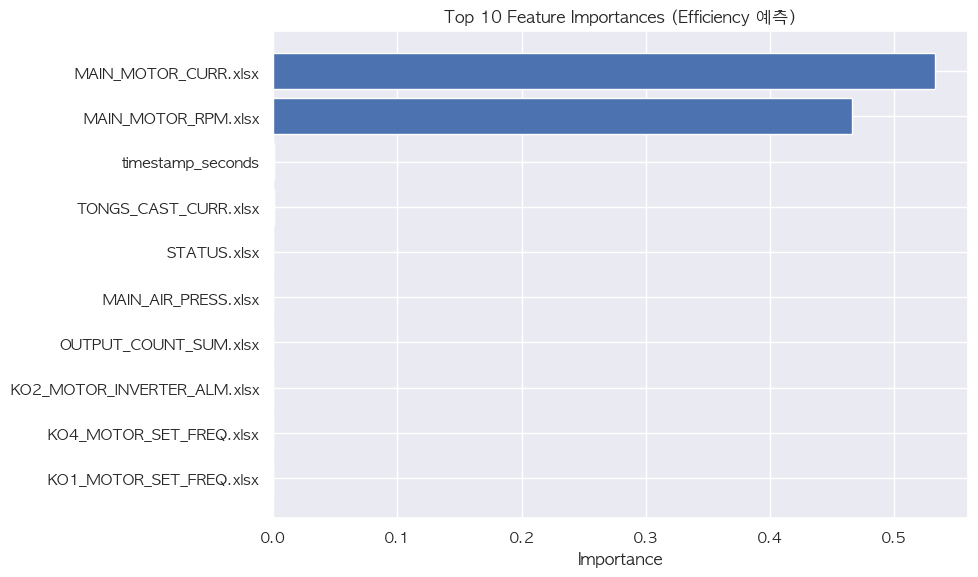

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# 중요도 + 컬럼 이름 매칭
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

# 상위 10개 출력
print(importance_df.head(10))

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:10][::-1], importance_df['importance'][:10][::-1])
plt.title('Top 10 Feature Importances (Efficiency 예측)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## y값 = Status

In [65]:
print(df['STATUS.xlsx'].unique())
print(df['STATUS.xlsx'].value_counts())

[0.  2.  0.5 1. ]
STATUS.xlsx
2.0    473227
0.0     82208
1.0      4075
0.5      2295
Name: count, dtype: int64


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# X, y 분리
X = df.drop(columns=['STATUS.xlsx', 'Timestamp'])  # 타겟과 날짜 제외
y = df['STATUS.xlsx']

# 필요 시 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [69]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

                              feature  importance
6                MAIN_MOTOR_CURR.xlsx    0.375439
40                         efficiency    0.274235
26    METAL_OIL_SUPPLY_PRESS_CUT.xlsx    0.075620
3   METAL_OIL_SUPPLY_PRESS_CONTR.xlsx    0.035372
17              OIL_SUPPLY_PRESS.xlsx    0.029313
38              OUTPUT_COUNT_SUM.xlsx    0.028684
37            OUTPUT_COUNT_DAY_2.xlsx    0.027711
0             OUTPUT_COUNT_DAY_1.xlsx    0.027691
41                  timestamp_seconds    0.026232
21         WORK_OIL_SUPPLY_PRESS.xlsx    0.016755


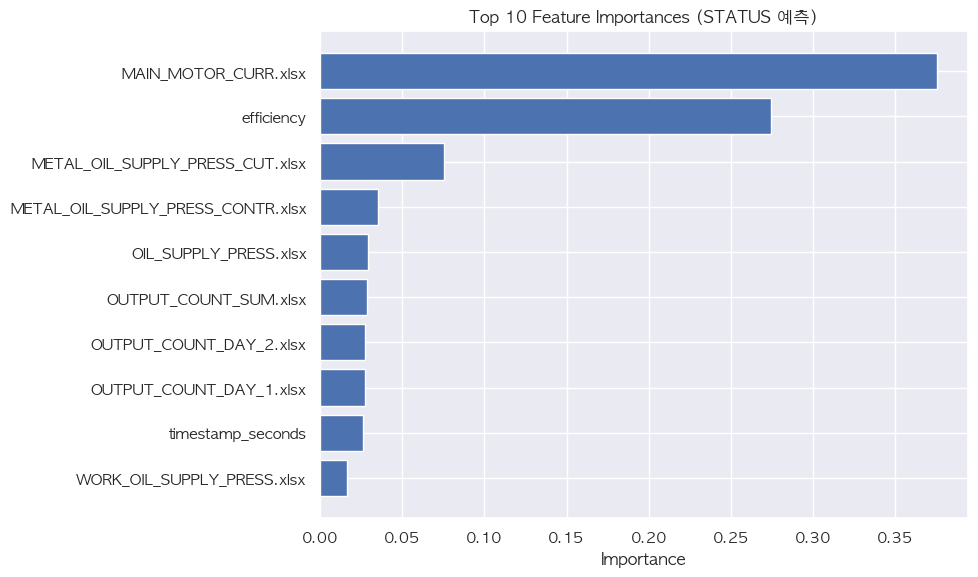

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importance_df.head(10))

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:10][::-1], importance_df['importance'][:10][::-1])
plt.title('Top 10 Feature Importances (STATUS 예측)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

                              feature  importance
6                MAIN_MOTOR_CURR.xlsx    0.375439
40                         efficiency    0.274235
26    METAL_OIL_SUPPLY_PRESS_CUT.xlsx    0.075620
3   METAL_OIL_SUPPLY_PRESS_CONTR.xlsx    0.035372
17              OIL_SUPPLY_PRESS.xlsx    0.029313
38              OUTPUT_COUNT_SUM.xlsx    0.028684
37            OUTPUT_COUNT_DAY_2.xlsx    0.027711
0             OUTPUT_COUNT_DAY_1.xlsx    0.027691
41                  timestamp_seconds    0.026232
21         WORK_OIL_SUPPLY_PRESS.xlsx    0.016755
29                METAL_TEMP_CUT.xlsx    0.016576
20                     TONGS_POS.xlsx    0.015632
27                MAIN_AIR_PRESS.xlsx    0.015543
22            METAL_TEMP_CONTROL.xlsx    0.011279
23               TONGS_CAST_CURR.xlsx    0.007480
11                MAIN_MOTOR_RPM.xlsx    0.005502
36        KO1_MOTOR_INVERTER_ALM.xlsx    0.001408
24   CUTTING_INVERTER_ALM_ERR_CD.xlsx    0.001126
15           TONGS_CAST_SET_FREQ.xlsx    0.001089


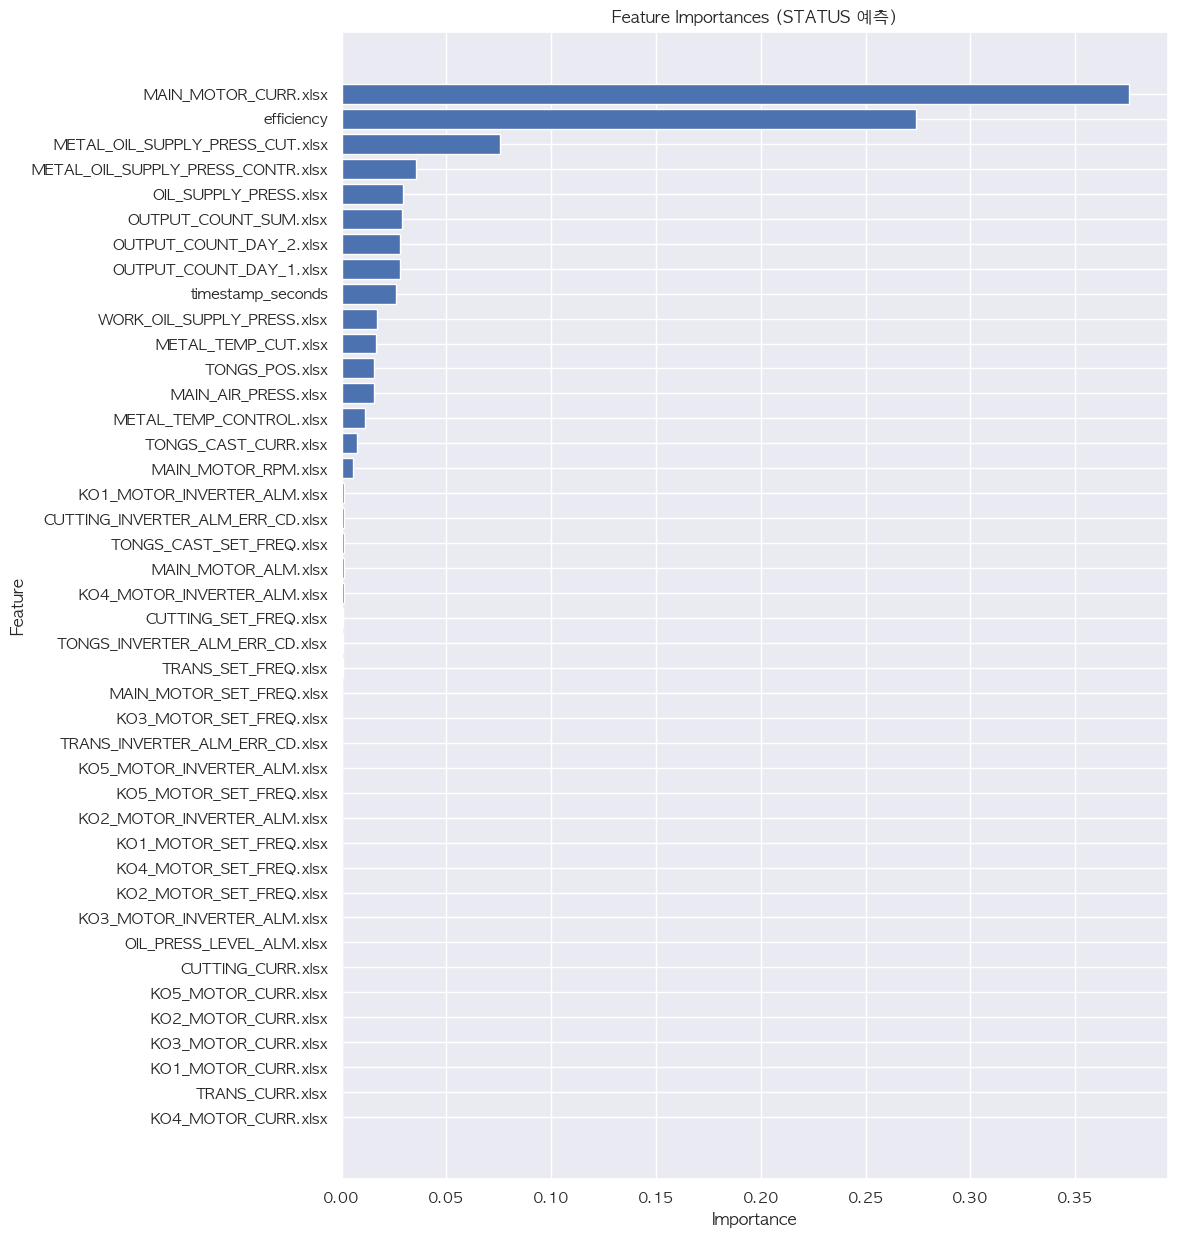

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# 중요도 정리
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

# 전체 출력
print(importance_df)

# 전체 시각화
plt.figure(figsize=(12, max(6, 0.3 * len(importance_df))))  # feature 수 많으면 자동 확장
plt.barh(importance_df['feature'][::-1], importance_df['importance'][::-1])
plt.title('Feature Importances (STATUS 예측)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()